In [3]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

In [4]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

#合并数据集
df_all = pd.concat([df_train, df_test]).reset_index(drop=True)
df_all.describe()

# PassengerId => 乘客ID
# Pclass => 乘客等级(1/2/3等舱位)
# Name => 乘客姓名
# Sex => 性别
# Age => 年龄
# SibSp => 堂兄弟/妹个数
# Parch => 父母与小孩个数
# Ticket => 船票信息
# Fare => 票价
# Cabin => 客舱
# Embarked => 登船港口

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
# 展示所有种类型特征
df_all.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [6]:
df_all.info()
df_all.head(5)


#上面的数据告诉我们，训练数据中总共有1309名乘客，但是很不幸，我们有些属性的数据不全，比如说：

# Age（年龄）属性只有1046名乘客有记录
# Cabin（客舱）更是只有295名乘客是已知的

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


粗略观察数据

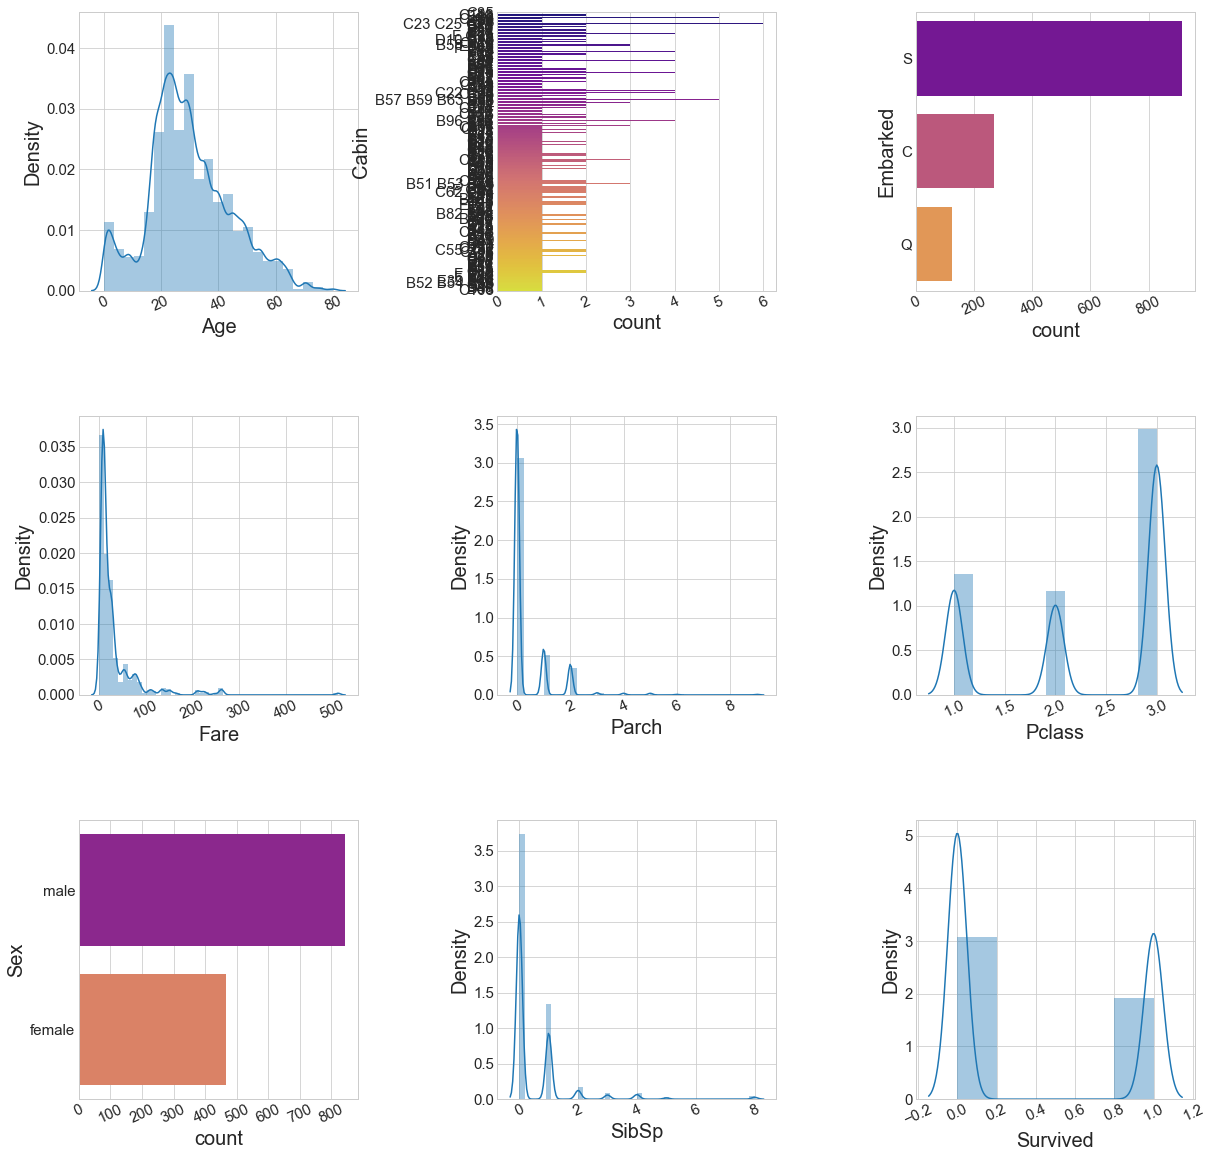

In [7]:
# 单特征展示Have a glance at data
import math
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)

    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        #ax.set_title(column)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('',fontsize=20)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset,palette='plasma')
            plt.xticks(rotation=25)
        else:
            #直方图，频数
            
            g = sns.distplot(dataset[column],kde_kws={'bw': 0.1})
            plt.ylabel(ylabel='Density',fontsize=20)
            plt.xticks(rotation=25)
            
    
plot_distribution(df_all[['Age','Cabin','Embarked','Fare','Parch','Pclass','Sex','SibSp','Survived']], cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

查看在不同获救情况下，性别与年龄之间的关系

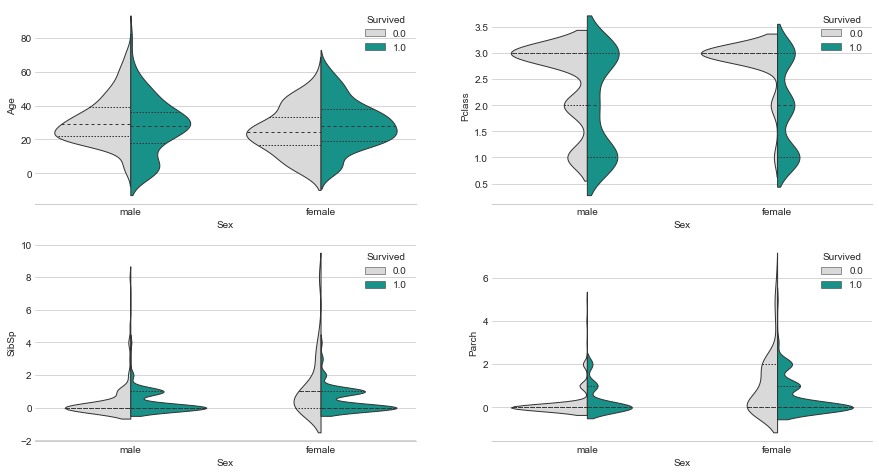

In [8]:
fig = plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.violinplot(data=df_all, x="Sex", y="Age", hue="Survived",
               split=True, inner="quart", linewidth=1,
               palette={1: "#04A699", 0: ".85"})
sns.despine(left=True)
plt.subplot(2,2,2)
sns.violinplot(data=df_all, x="Sex", y="Pclass", hue="Survived",
               split=True, inner="quart", linewidth=1,
               palette={1: "#04A699", 0: ".85"})
sns.despine(left=True)
plt.subplot(2,2,3)
sns.violinplot(data=df_all, x="Sex", y="SibSp", hue="Survived",
               split=True, inner="quart", linewidth=1,
               palette={1: "#04A699", 0: ".85"})
sns.despine(left=True)
plt.subplot(2,2,4)
sns.violinplot(data=df_all, x="Sex", y="Parch", hue="Survived",
               split=True, inner="quart", linewidth=1,
               palette={1: "#04A699", 0: ".85"})
sns.despine(left=True)

# 由上图可以得出以下结论：
1. 不同生存情况下，男女性别在年龄分布中相似。
2. 不同舱位生存比例不一，男女各舱位分布相似。
3. 女性获救乘员中，兄弟姐妹的影响似乎很大。

# 因此，下面我们着重看一下Pclass与生存的关系

<AxesSubplot:>

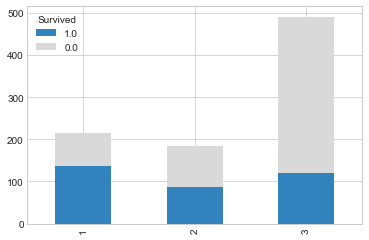

In [9]:
s_pclass= df_all['Survived'].groupby(df_all['Pclass'])
s_pclass = s_pclass.value_counts().unstack()
s_pclass= s_pclass[[1.0,0.0]]
s_pclass.index=['1','2','3']
s_pclass.plot(kind='bar',stacked = True, colormap='tab20c')

#显然，lower class的乘客死亡率较高

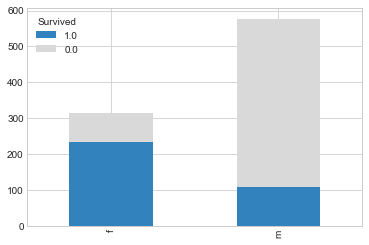

In [10]:
s_sex = df_all['Survived'].groupby(df_all['Sex'])
s_sex = s_sex.value_counts().unstack()
s_sex = s_sex[[1.0,0.0]]
s_sex.index=['f','m']
ax = s_sex.plot(kind='bar',stacked=True,colormap='tab20c')

#男性乘客幸存率远小于女性，窥见lady-first原则

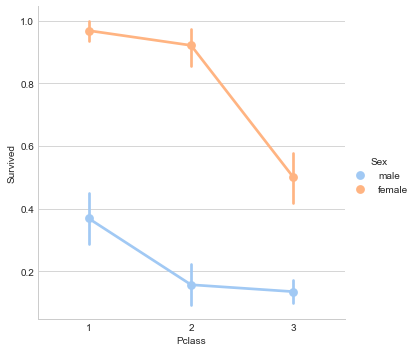

In [11]:
sns.catplot(x="Pclass",y='Survived', hue="Sex", kind="point",
            palette="pastel", edgecolor=".6",
            data=df_all)


#可见，性别和舱位对生存的影响很大，特别是性别

<AxesSubplot:>

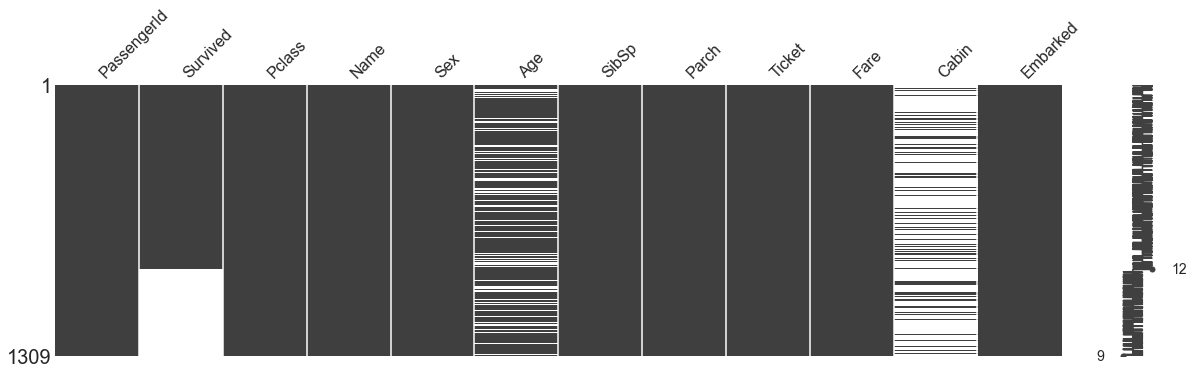

In [12]:
missingno.matrix(df_all, figsize = (20,5))

<AxesSubplot:>

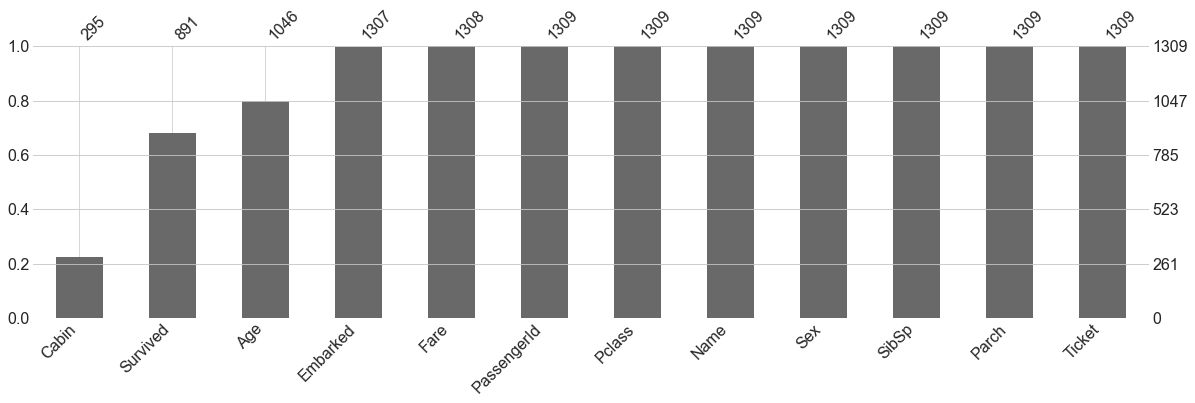

In [13]:
missingno.bar(df_all, sort='ascending', figsize = (20,5))

# 数据清洗

In [14]:
# 通过谷歌搜索唯二的两个乘客名字，可以得知登陆港口信息，不过这里我是引用gunesevitan的结论
df_all['Embarked'] = df_all['Embarked'].fillna('S')
df_all['Embarked'].head()

#对Cabin缺失值进行处理，利用U（Unknown）填充缺失值
df_all['Cabin']=df_all['Cabin'].fillna('U')
df_all['Cabin'].head()

#查看缺失值
df_all[df_all['Fare'].isnull()]

#假设船票价和Cabin,Pclass以及Embarked有关(按照常理推断)
df_all['Fare']=df_all['Fare'].fillna(df_all[(df_all['Pclass']==3)&(df_all['Embarked']=='S')&(df_all['Cabin']=='U')]['Fare'].mean())

In [15]:
# 因为Age项缺失较多，所以不能直接将其填充为众数或者平均数。常见有两种填充法，一是根据Title项中的Mr、Master、Miss等称呼的平均年龄填充，
#或者综合几项（Sex、Title、Pclass）的Age均值。
# 二是利用其他组特征量，采用机器学习算法来预测Age，本例采用的是第二种方法。


#将Age完整的项作为训练集、将Age缺失的项作为测试集。
missing_age_df = df_all.iloc[:,[1,2,4,5,6,7,8,9,10,11]]
missing_age_df['Sex']= missing_age_df['Sex'].factorize()[0]
missing_age_df['Embarked']= missing_age_df['Embarked'].factorize()[0]
missing_age_df['Cabin']= missing_age_df['Cabin'].factorize()[0]
missing_age_df.corr()['Age'].sort_values(0)



Pclass     -0.408106
SibSp      -0.243699
Parch      -0.150917
Survived   -0.077221
Sex        -0.063645
Embarked    0.047410
Fare        0.177531
Cabin       0.272991
Age         1.000000
Name: Age, dtype: float64

In [16]:
missing_age_df = pd.DataFrame(missing_age_df[['Age', 'Parch','SibSp','Fare', 'Pclass','Cabin']])

age_train=missing_age_df[missing_age_df['Age'].notnull()]
age_test=missing_age_df[missing_age_df['Age'].isnull()]

#生成训练数据的特征和标签
age_train_X=age_train.drop(['Age'],axis=1)
age_train_y=age_train['Age']
#生成测试数据的特征
age_test_X=age_test.drop(['Age'],axis=1)

#利用随机森林构建模型
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=1, n_estimators=2000, n_jobs=-1)
rfr.fit(age_train_X,age_train_y)

#模型得分
print('模型得分：',rfr.score(age_train_X,age_train_y))

模型得分： 0.6871636176641064


<AxesSubplot:>

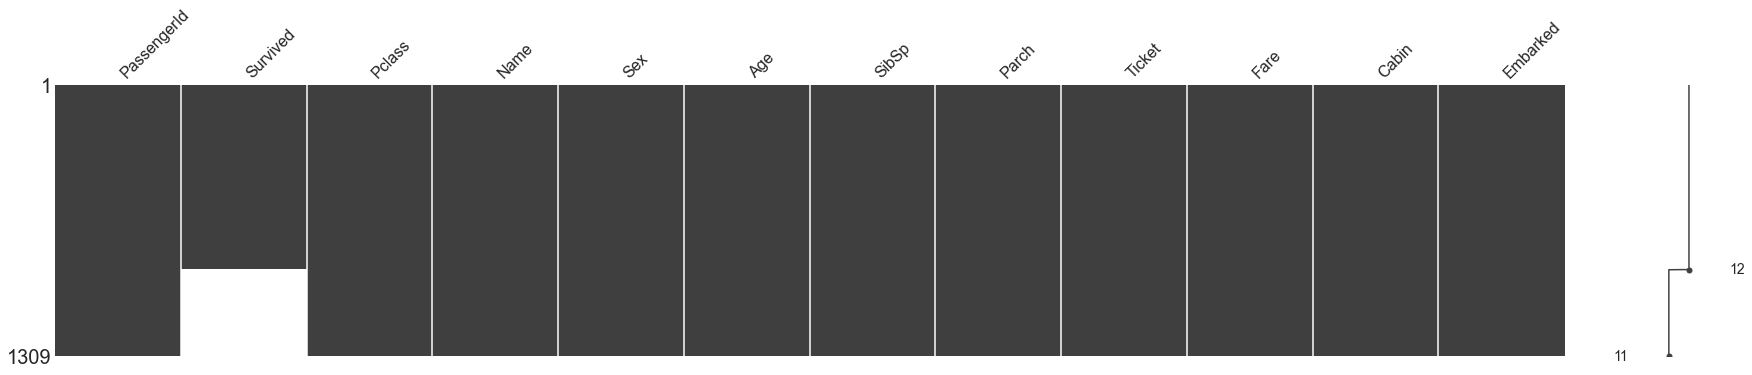

In [17]:
#预测年龄
age_test_y=rfr.predict(age_test_X)
#填充预测数据
df_all.loc[df_all['Age'].isnull(),['Age']]=age_test_y
# 缺失值显示
missingno.matrix(df_all, figsize = (30,5))

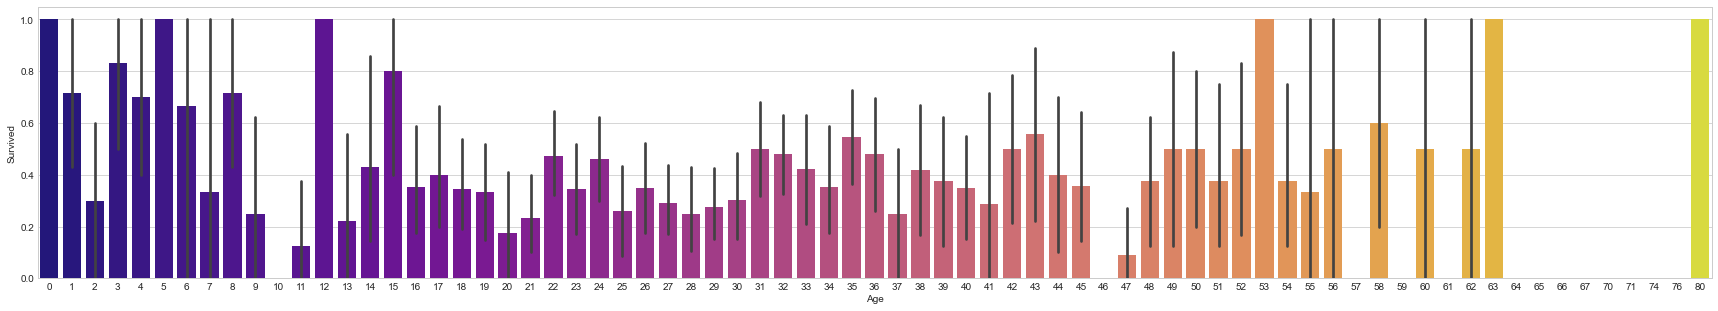

In [18]:
#填补完age来看一下age对生存的影响

df_all['Age'] = df_all['Age'].astype(int)
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(30,5)) 
sns.barplot(x="Age", y='Survived',data=df_all,palette='plasma');


#影响不是特别大，整体来说，儿童/青少年生存率较大

# 特征工程

In [19]:
# 展示所有种类型特征
df_all.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,1309,1309
unique,1307,2,929,187,3
top,"Kelly, Mr. James",male,CA. 2343,U,S
freq,2,843,11,1014,916


<AxesSubplot:xlabel='Cabin', ylabel='count'>

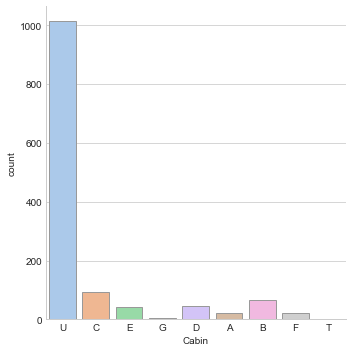

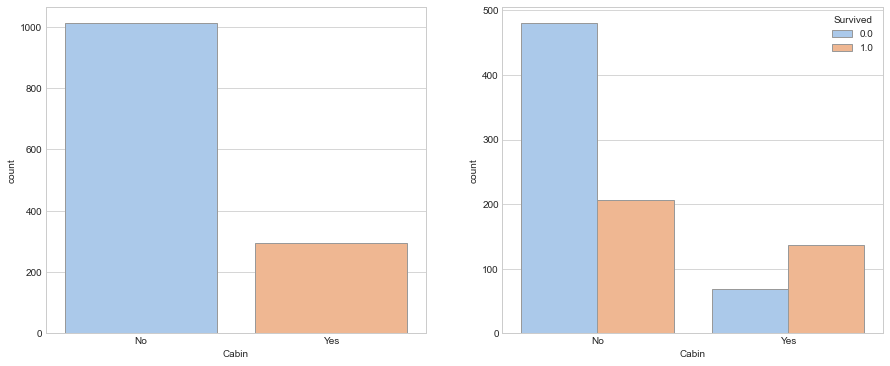

In [20]:
# Cabin
# 由于有大量的缺失值，我们采取二分类的方式进行特征转换

df_all['Cabin'] = df_all['Cabin'].apply(lambda x:x[0])
sns.catplot(x="Cabin", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_all)


df_all.loc[ (df_all.Cabin !='U'), 'Cabin' ] = "Yes"
df_all.loc[ (df_all.Cabin =='U'), 'Cabin' ] = "No"

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,6)) 
plt.subplot(1,2,1)
sns.countplot(x="Cabin",
            palette="pastel", edgecolor=".6",
            data=df_all)
plt.subplot(1,2,2)
sns.countplot(x="Cabin", hue="Survived",palette="pastel", edgecolor=".6",
            data=df_all)


#通过对Cabin的二分类，发现有没有Cabin的乘客幸存率是有差异的

In [21]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,No,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,Yes,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,Yes,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,No,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29,0,0,A.5. 3236,8.0500,No,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,Yes,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,No,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29,0,0,359309,8.0500,No,S


In [22]:
#将类别型数据转换为0，1数据



dummies_Cabin = pd.get_dummies(df_all['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(df_all['Embarked'], prefix= 'Embarked')


dummies_Sex = pd.get_dummies(df_all['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(df_all['Pclass'], prefix= 'Pclass')

df = pd.concat([df_all, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [23]:
#将数值型数据进行归一化

import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1), fare_scale_param)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0.0,22,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.573587,-0.503292
1,2,1.0,38,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.617137,0.734743
2,3,1.0,26,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.275906,-0.490242
3,4,1.0,35,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.393876,0.383183
4,5,0.0,35,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.393876,-0.487825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,29,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,-0.052646,-0.487825
1305,1306,NaN,39,0,0,108.9000,0,1,1,0,0,1,0,1,0,0,0.691557,1.462033
1306,1307,NaN,38,0,0,7.2500,1,0,0,0,1,0,1,0,0,1,0.617137,-0.503292
1307,1308,NaN,29,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,-0.052646,-0.487825


In [24]:
#

df.drop(['Age','Fare'], axis=1, inplace=True)
df

,PassengerId,Survived,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0.0,1,0,1,0,0,0,1,0,1,0,0,1,-0.573587,-0.503292
1,2,1.0,1,0,0,1,1,0,0,1,0,1,0,0,0.617137,0.734743
2,3,1.0,0,0,1,0,0,0,1,1,0,0,0,1,-0.275906,-0.490242
3,4,1.0,1,0,0,1,0,0,1,1,0,1,0,0,0.393876,0.383183
4,5,0.0,0,0,1,0,0,0,1,0,1,0,0,1,0.393876,-0.487825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,0,0,1,0,0,0,1,0,1,0,0,1,-0.052646,-0.487825
1305,1306,NaN,0,0,0,1,1,0,0,1,0,1,0,0,0.691557,1.462033
1306,1307,NaN,0,0,1,0,0,0,1,0,1,0,0,1,0.617137,-0.503292
1307,1308,NaN,0,0,1,0,0,0,1,0,1,0,0,1,-0.052646,-0.487825


In [25]:
df.head().to_csv("D:\FileRecv\data.csv")

In [26]:
df_train=df[df['Survived'].notnull()]
train_y=df_train.iloc[:,1]
train_x=df_train.iloc[:,2:]

df_test=df[df['Survived'].isnull()]
test_x=df_test.iloc[:,2:]


test_x

,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
891,0,0,1,0,0,1,0,0,1,0,0,1,0.319456,-0.492094
892,1,0,1,0,0,0,1,1,0,0,0,1,1.286919,-0.508126
893,0,0,1,0,0,1,0,0,1,0,1,0,2.403223,-0.456165
894,0,0,1,0,0,0,1,0,1,0,0,1,-0.201486,-0.475983
895,1,1,1,0,0,0,1,1,0,0,0,1,-0.573587,-0.405896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,0,1,0,0,0,1,0,1,0,0,1,-0.052646,-0.487825
1305,0,0,0,1,1,0,0,1,0,1,0,0,0.691557,1.462033
1306,0,0,1,0,0,0,1,0,1,0,0,1,0.617137,-0.503292
1307,0,0,1,0,0,0,1,0,1,0,0,1,-0.052646,-0.487825


In [27]:
data=pd.read_csv("gender_submission.csv")
test_y=data.iloc[:,1]

sum(test_y)/len(test_y)

0.36363636363636365

In [28]:
#计算相关系数
df_train.corr()["Survived"].sort_values(ascending=False)


Survived       1.000000
Sex_female     0.543351
Cabin_Yes      0.316912
Pclass_1       0.285904
Fare_scaled    0.257307
Embarked_C     0.168240
Pclass_2       0.093349
Parch          0.081629
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age_scaled    -0.062699
Embarked_S    -0.149683
Cabin_No      -0.316912
Pclass_3      -0.322308
Sex_male      -0.543351
Name: Survived, dtype: float64

In [29]:
train_y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

# 类

In [34]:
#结果展现  类的定义
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import classification_report

class estimator():
    def __init__(self,train_x,train_y,test_x,test_y,clf):
        try:
            self.train_x=train_x
            self.train_y=train_y
            self.test_x=test_x
            self.test_y=test_y
            #模型拟合
            self.model=clf.fit(train_x,train_y)
            self.train_pred=self.model.predict(train_x)
            self.test_pred=self.model.predict(test_x)
        except ValueError as e:
            print(e)
            print("传入参数维度可能不匹配！")
            
        
    def roc_curve(self):
        test_y_score = self.model.decision_function(self.train_x)
        prediction = self.model.predict(self.train_x)

        # Compute ROC curve and ROC area for each class
        fpr, tpr, threshold = roc_curve(self.train_y, test_y_score)  ###计算真正率和假正率
        roc_auc = auc(fpr, tpr)  ###计算auc的值

        lw = 2
        plt.figure(figsize=(8, 5))
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  ###假正率为横坐标，真正率为纵坐标做曲线
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
    def confusion_matrix(self):
        C = confusion_matrix(np.array(train_y),train_pred) 
        C1 = confusion_matrix(np.array(test_y),test_pred) 
        print("confusion_matrix of train：")
        fig, ax = plt.subplots(figsize = (8,6))
        sns.heatmap(C,annot=True,ax=ax,square=True,cmap='YlGnBu') #画热力图
        ax.set_title('confusion matrix') #标题
        ax.set_xlabel('predict') #x轴
        ax.set_ylabel('true') #y轴
        plt.show()
        
       
        print("confusion_matrix of test：")
        fig, ax = plt.subplots(figsize = (8,6))
        sns.heatmap(C1,annot=True,ax=ax,square=True,cmap='YlGnBu') #画热力图
        ax.set_title('confusion matrix') #标题
        ax.set_xlabel('predict') #x轴
        ax.set_ylabel('true') #y轴
        plt.show()
        
        
    def Evaluation_indicators(self):
        print("train:")
        print(classification_report(self.train_y, self.train_pred))
        print("test:")
        print(classification_report(self.test_y, self.test_pred))

    


In [69]:
lr=LogisticRegression(C=0.15, solver='sag',penalty='l2',max_iter=10000)
lr_result=estimator(train_x[:20],train_y,test_x,test_y,lr)


Found input variables with inconsistent numbers of samples: [20, 891]
传入参数维度可能不匹配！


# 逻辑回归

In [35]:
#baseline

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_x,train_y)

train_pred=model.predict(train_x)
test_pred=model.predict(test_x)
sum(train_pred==train_y)/len(train_pred)
#训练集准确率81.8%
sum(test_pred==test_y)/len(test_pred)
#测试集准确率92.8%





0.9282296650717703

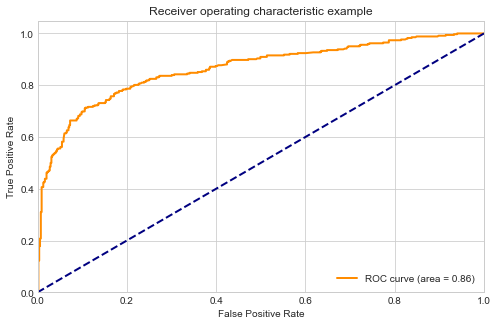

confusion_matrix of train：


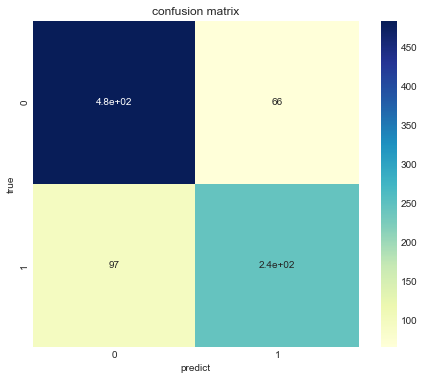

confusion_matrix of test：


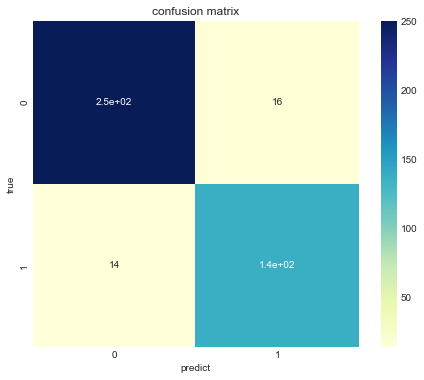

train:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       549
         1.0       0.79      0.72      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.82      0.82      0.82       891

test:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       266
           1       0.90      0.91      0.90       152

    accuracy                           0.93       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



In [36]:
model=LogisticRegression()
lr_result=estimator(train_x,train_y,test_x,test_y,model)
lr_result.roc_curve()
lr_result.confusion_matrix()
lr_result.Evaluation_indicators()

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve, auc, recall_score, classification_report

#在l2范式下，判断C和solver的最优值
p = {
    'C':list(np.linspace(0.05,1,19)),
    'solver':['liblinear','sag','newton-cg','lbfgs']}

model = LogisticRegression(penalty='l2',max_iter=10000)
GS = GridSearchCV(model,p,cv=5)
GS.fit(train_x,train_y)
#输出最优参数
GS.best_params_


{'C': 0.15555555555555556, 'solver': 'sag'}

In [38]:
model1=LogisticRegression(C=0.15, solver='sag',penalty='l2',max_iter=10000)
model1.fit(train_x,train_y)
train_pred=model1.predict(train_x)
test_pred=model1.predict(test_x)


#训练集:82%
print(classification_report(train_y, train_pred))
#测试集:93%
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       549
         1.0       0.79      0.71      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.81      0.82      0.81       891

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       266
           1       0.89      0.91      0.90       152

    accuracy                           0.93       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



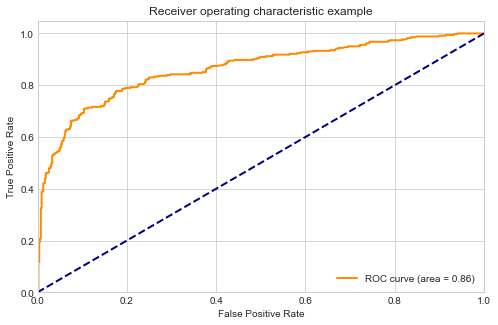

confusion_matrix of train：


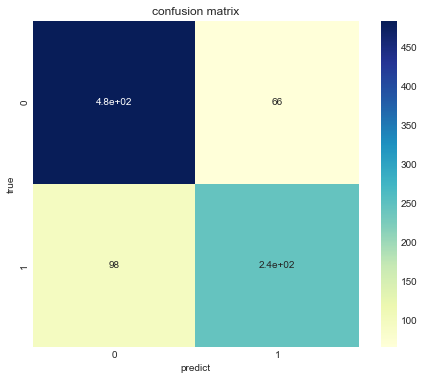

confusion_matrix of test：


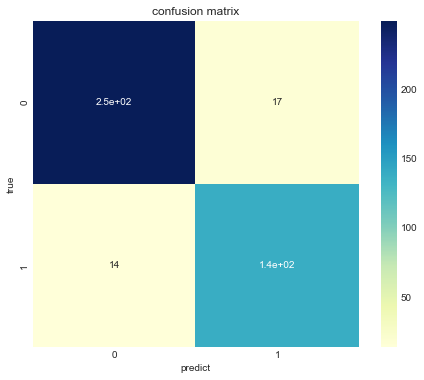

train:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       549
         1.0       0.79      0.71      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.81      0.82      0.81       891

test:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       266
           1       0.89      0.91      0.90       152

    accuracy                           0.93       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



In [39]:
model1=LogisticRegression(C=0.15, solver='sag',penalty='l2',max_iter=10000)

lr_result=estimator(train_x,train_y,test_x,test_y,model1)
lr_result.roc_curve()
lr_result.confusion_matrix()
lr_result.Evaluation_indicators()

# 随机森林

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [41]:
rf1 = RandomForestClassifier()
rf1.fit(train_x,train_y)

train_pred=rf1.predict(train_x)
test_pred=rf1.predict(test_x)


#训练集:98%
print(classification_report(train_y, train_pred))
#测试集:81%
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       549
         1.0       0.99      0.97      0.98       342

    accuracy                           0.99       891
   macro avg       0.99      0.98      0.98       891
weighted avg       0.99      0.99      0.99       891

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       266
           1       0.74      0.78      0.76       152

    accuracy                           0.82       418
   macro avg       0.81      0.81      0.81       418
weighted avg       0.82      0.82      0.82       418



0.819338327091136 191


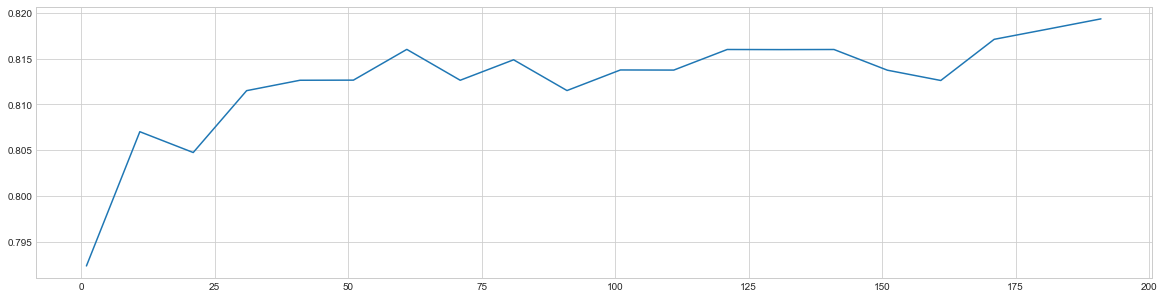

In [42]:
from sklearn.model_selection import cross_val_score #交叉验证
## 随机森林调整的第一步：无论如何先来调n_estimators，以10为分隔点
scorel = []
for i in range(0,200,10):
    RFC = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(RFC,train_x,train_y,cv=10).mean()
    scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)  #作图反映出准确度随着估计器数量的变化，121的附近最好
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()


0.8204619225967541 193


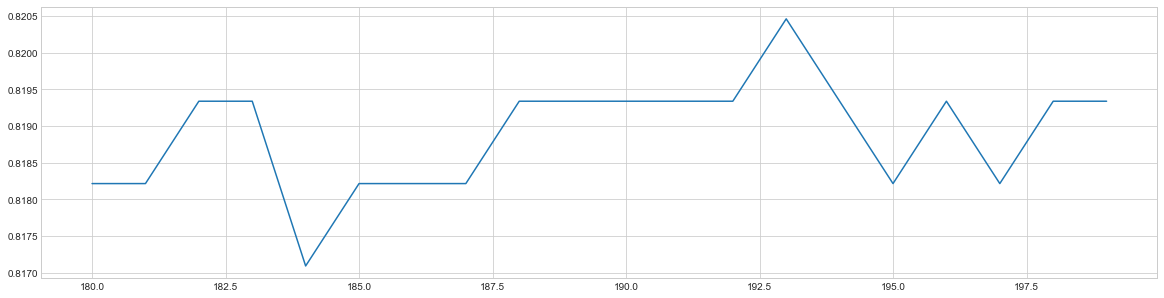

In [43]:
#根据上面的显示最优点在191附近，进一步细化学习曲线，在180-200之间寻找具体数值。

## 根据上面的显示最优点在191附近，进一步细化学习曲线
scorel = []
for i in range(180,200):
    RFC = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(RFC,train_x,train_y,cv=10).mean()
    scorel.append(score)

print(max(scorel),([*range(180,200)][scorel.index(max(scorel))]))  #112是最优的估计器数量 #最优得分是0.98945
plt.figure(figsize=[20,5])
plt.plot(range(180,200),scorel) 
plt.show()


In [44]:
#　这样我们得到了最佳的弱学习器迭代次数，接着我们对决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split进行网格搜索。

param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(10,101,20)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 193, random_state=90),
   param_grid = param_test2,cv=5)
gsearch2.fit(train_x,train_y)


gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 13, 'min_samples_split': 10}, 0.8260561170045821)

In [45]:
rf1 = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,random_state=90)
rf1.fit(train_x,train_y)


train_pred=rf1.predict(train_x)
test_pred=rf1.predict(test_x)
print(sum(train_pred==train_y)/len(train_pred))
#训练集准确率89%
print(sum(test_pred==test_y)/len(test_pred))
# #测试集准确率85%

0.8978675645342312
0.8588516746411483


In [46]:
# 对于内部节点再划分所需最小样本数min_samples_split，我们暂时不能一起定下来，因为这个还和决策树其他的参数存在关联。
# 下面我们再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf一起调参。


param_test3 = {'min_samples_split':range(40,150,20), 'min_samples_leaf':range(10,60,10)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,random_state=90),
   param_grid = param_test3, cv=5)


gsearch3.fit(train_x,train_y)


gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 10, 'min_samples_split': 40}, 0.8069675475488042)

In [47]:

param_test3 = {'min_samples_split':range(30,50,5), 'min_samples_leaf':range(1,20,5)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,random_state=90),
   param_grid = param_test3, cv=5)


gsearch3.fit(train_x,train_y)


gsearch3.best_params_, gsearch3.best_score_


#效果不是很好，选择默认值

({'min_samples_leaf': 1, 'min_samples_split': 40}, 0.8159437574540205)

In [48]:
param_grid = {'criterion':['gini', 'entropy']}

gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,random_state=90),
   param_grid = param_grid, cv=5)


gsearch4.fit(train_x,train_y)


gsearch4.best_params_, gsearch4.best_score_


#选择默认值

({'criterion': 'gini'}, 0.8260561170045821)

In [49]:
param_grid = {'max_features':range(1,11,2)}
gsearch5 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,random_state=90),
   param_grid = param_grid, cv=5)


gsearch5.fit(train_x,train_y)


gsearch5.best_params_, gsearch5.best_score_

({'max_features': 9}, 0.8361433682756889)

In [50]:
param_grid = {'max_features':range(6,11,1)}
gsearch5 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,random_state=90),
   param_grid = param_grid, cv=5)


gsearch5.fit(train_x,train_y)


gsearch5.best_params_, gsearch5.best_score_

({'max_features': 10}, 0.8395141547925429)

In [51]:
rf2 = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,max_features=10,random_state=90)
rf2.fit(train_x,train_y)


train_pred=rf2.predict(train_x)
test_pred=rf2.predict(test_x)
print(sum(train_pred==train_y)/len(train_pred))
#训练集准确率91%
print(sum(test_pred==test_y)/len(test_pred))
# #测试集准确率86%

0.9124579124579124
0.868421052631579


In [52]:
#计算重要性
forest = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,max_features=10,random_state=90)
forest.fit(train_x, train_y)
score = forest.score(test_x, test_y)  # score=0.98148
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] # 下标排序
for f in range(train_x.shape[1]):   # x_train.shape[1]=13
    print(" %-*s & %.3f\\\\" % \
          ( 30, train_x.columns[indices[f]], importances[indices[f]]))


 Sex_female                     & 0.217\\
 Age_scaled                     & 0.185\\
 Sex_male                       & 0.180\\
 Fare_scaled                    & 0.176\\
 Pclass_3                       & 0.089\\
 SibSp                          & 0.042\\
 Cabin_No                       & 0.021\\
 Cabin_Yes                      & 0.020\\
 Embarked_S                     & 0.016\\
 Parch                          & 0.016\\
 Pclass_1                       & 0.014\\
 Embarked_C                     & 0.008\\
 Pclass_2                       & 0.008\\
 Embarked_Q                     & 0.007\\


confusion_matrix of train：


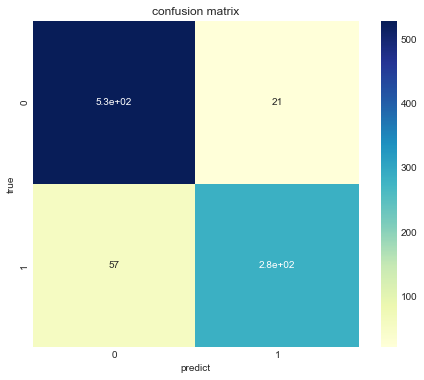

confusion_matrix of test：


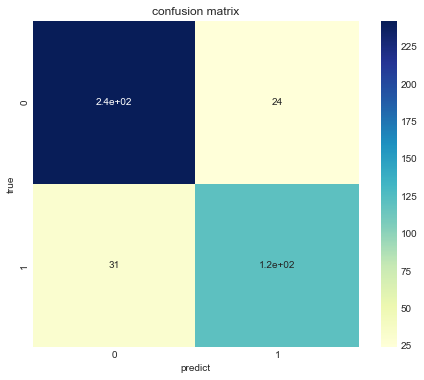

train:
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       549
         1.0       0.93      0.83      0.88       342

    accuracy                           0.91       891
   macro avg       0.92      0.90      0.91       891
weighted avg       0.91      0.91      0.91       891

test:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       266
           1       0.83      0.80      0.81       152

    accuracy                           0.87       418
   macro avg       0.86      0.85      0.86       418
weighted avg       0.87      0.87      0.87       418



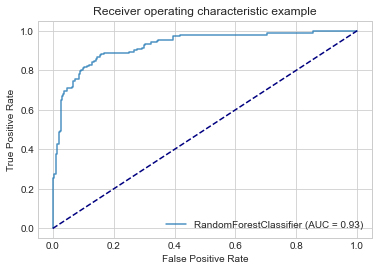

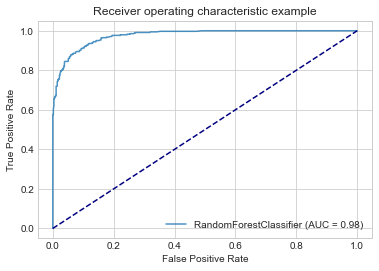

In [55]:
rf2 = RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,max_features=10,random_state=90)

rf_result=estimator(train_x,train_y,test_x,test_y,rf2)

rf_result.confusion_matrix()
rf_result.Evaluation_indicators()
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(rf2,test_x,test_y, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ax = plt.gca()
rfc_disp = plot_roc_curve(rf2,train_x,train_y, ax=ax, alpha=0.8)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(train_x,train_y)


train_pred=knn.predict(train_x)
test_pred=knn.predict(test_x)
print(sum(train_pred==train_y)/len(train_pred))
#训练集准确率87%
print(sum(test_pred==test_y)/len(test_pred))
# #测试集准确率81%

0.8754208754208754
0.8133971291866029


In [58]:

param_test = {'n_neighbors':list(range(1,11,2))}
gsearch = GridSearchCV(estimator = KNeighborsClassifier(),
   param_grid = param_test, cv=5)


gsearch.fit(train_x,train_y)


gsearch.best_params_, gsearch.best_score_

({'n_neighbors': 5}, 0.8148013307388112)

In [59]:
param_test = {'n_neighbors':list(range(4,7))}
gsearch = GridSearchCV(estimator = KNeighborsClassifier(),
   param_grid = param_test, cv=5)


gsearch.fit(train_x,train_y)


gsearch.best_params_, gsearch.best_score_

({'n_neighbors': 5}, 0.8148013307388112)

In [60]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(train_x,train_y)


train_pred=knn.predict(train_x)
test_pred=knn.predict(test_x)
print(sum(train_pred==train_y)/len(train_pred))
#训练集准确率86%
print(sum(test_pred==test_y)/len(test_pred))
# #测试集准确率84%

0.8608305274971941
0.8421052631578947


# 投票

In [61]:
from sklearn.ensemble import VotingClassifier

estimators=[]
estimators.append(('lgr',model1))
estimators.append(('rfc',rf2))

vc=VotingClassifier(voting='hard',estimators=estimators)
vc.fit(train_x,train_y)

train_pred=vc.predict(train_x)
test_pred=vc.predict(test_x)
print(sum(train_pred==train_y)/len(train_pred))
#训练集准确率86%
print(sum(test_pred==test_y)/len(test_pred))
# #测试集准确率89%


0.8641975308641975
0.8947368421052632


In [62]:
estimators=[]
estimators.append(('lgr',model1))
estimators.append(('rfc',rf2))
estimators.append(('knn',knn))

vc=VotingClassifier(voting='hard',estimators=estimators,weights=[3,3,1])
vc.fit(train_x,train_y)

train_pred=vc.predict(train_x)
test_pred=vc.predict(test_x)
print(sum(train_pred==train_y)/len(train_pred))
#训练集准确率86%
print(sum(test_pred==test_y)/len(test_pred))
# #测试集准确率89%


0.877665544332211
0.8923444976076556


confusion_matrix of train：


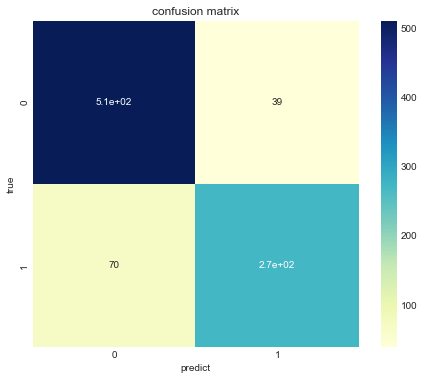

confusion_matrix of test：


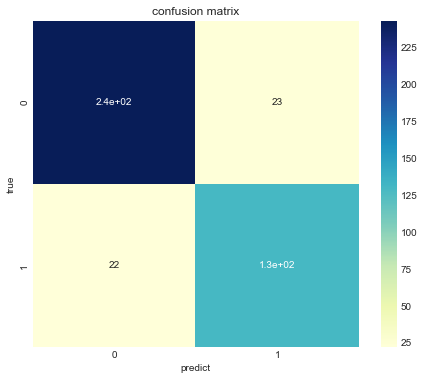

train:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       549
         1.0       0.87      0.80      0.83       342

    accuracy                           0.88       891
   macro avg       0.88      0.86      0.87       891
weighted avg       0.88      0.88      0.88       891

test:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       266
           1       0.85      0.86      0.85       152

    accuracy                           0.89       418
   macro avg       0.88      0.88      0.88       418
weighted avg       0.89      0.89      0.89       418



In [63]:
final_result=estimator(train_x,train_y,test_x,test_y,vc)
#final_result.roc_curve()
final_result.confusion_matrix()
print("train:")
print(classification_report(train_y,train_pred))
print("test:")
print(classification_report(test_y,test_pred))





In [64]:
#结果展现  类的定义

from sklearn.metrics import roc_curve, auc  ###计算roc和auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

class estimator():
    def __init__(self,train_x,train_y,test_x,test_y,clf):
        try:
            self.train_x=train_x
            self.train_y=train_y
            self.test_x=test_x
            self.test_y=test_y
            #模型拟合
            self.model=clf.fit(train_x,train_y)
            self.train_pred=self.model.predict(train_x)
            self.test_pred=self.model.predict(test_x)
        except ValueError as e:
            print(e)
            print("传入参数维度可能不匹配！")
            
        
    def roc_curve(self):
        test_y_score = self.model.decision_function(self.train_x)
        prediction = self.model.predict(self.train_x)

        # Compute ROC curve and ROC area for each class
        fpr, tpr, threshold = roc_curve(self.train_y, test_y_score)  ###计算真正率和假正率
        roc_auc = auc(fpr, tpr)  ###计算auc的值

        lw = 2
        plt.figure(figsize=(8, 5))
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  ###假正率为横坐标，真正率为纵坐标做曲线
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
    def confusion_matrix(self):
        C = confusion_matrix(np.array(train_y),train_pred) 
        C1 = confusion_matrix(np.array(test_y),test_pred) 
        print("confusion_matrix of train：")
        fig, ax = plt.subplots(figsize = (8,6))
        sns.heatmap(C,annot=True,ax=ax,square=True,cmap='YlGnBu') #画热力图
        ax.set_title('confusion matrix') #标题
        ax.set_xlabel('predict') #x轴
        ax.set_ylabel('true') #y轴
        plt.show()
        
       
        print("confusion_matrix of test：")
        fig, ax = plt.subplots(figsize = (8,6))
        sns.heatmap(C1,annot=True,ax=ax,square=True,cmap='YlGnBu') #画热力图
        ax.set_title('confusion matrix') #标题
        ax.set_xlabel('predict') #x轴
        ax.set_ylabel('true') #y轴
        plt.show()
        
        
    def Evaluation_indicators(self):
        print("train:")
        print(classification_report(self.train_y, self.train_pred))
        print("test:")
        print(classification_report(self.test_y, self.test_pred))

    



In [66]:
vc=VotingClassifier(voting='hard',estimators=estimators,weights=[4,3,1])

lr=LogisticRegression(C=0.15, solver='sag',penalty='l2',max_iter=10000)

knn=KNeighborsClassifier(n_neighbors=5)

rfc=RandomForestClassifier(n_estimators= 193, max_depth=13, min_samples_split=10,max_features=10,random_state=90)

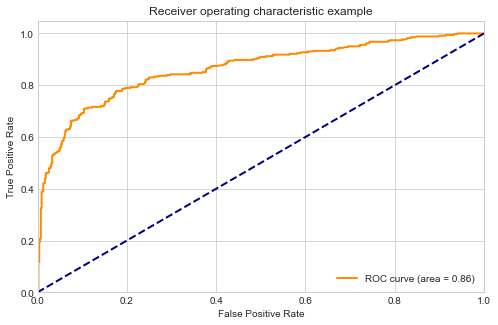

confusion_matrix of train：


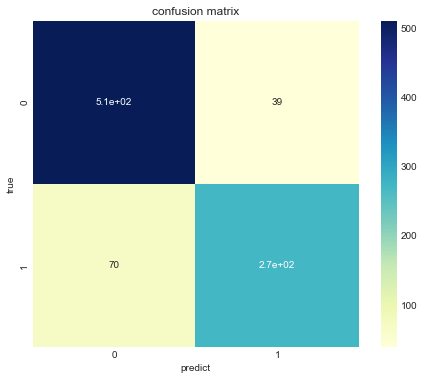

confusion_matrix of test：


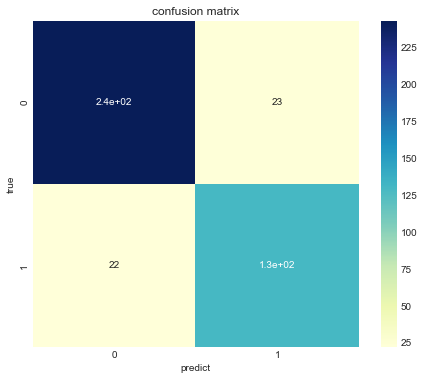

train:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       549
         1.0       0.79      0.71      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.81      0.82      0.81       891

test:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       266
           1       0.89      0.91      0.90       152

    accuracy                           0.93       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



In [67]:
lr=LogisticRegression(C=0.15, solver='sag',penalty='l2',max_iter=10000)
lr_result=estimator(train_x,train_y,test_x,test_y,lr)
lr_result.roc_curve()
lr_result.confusion_matrix()
lr_result.Evaluation_indicators()
